In [1]:
import os
import glob as gb
data_dir='/Users/ankushsingal/Desktop/TF_2_Notebooks_and_Data/04-CNNs/cell_images'
os.listdir(data_dir)
#https://www.kaggle.com/youssefalsoufi/cnn-for-image-classification

['.DS_Store', 'test', 'train']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
sns.set(style="whitegrid")

#libraries for plotting the model
import pydot
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [3]:
test_path = data_dir+"/test"
train_path = data_dir+"/train"

In [4]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

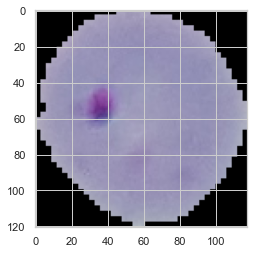

In [7]:
para_cell = train_path+'/parasitized'+'/C189P150ThinF_IMG_20151203_142224_cell_84.png'
plt.imshow(imread(para_cell))

In [8]:
os.listdir(train_path+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

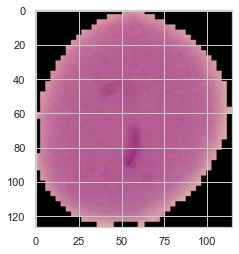

In [9]:
unaffected_cell = train_path+'/uninfected'+'/C13NThinF_IMG_20150614_131318_cell_179.png'
plt.imshow(imread(unaffected_cell))

# Open the folders:

In [10]:
#Train Data
for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path+"/"+folder +'/*.png'))
    print(f"{len(files)} images are found in '{folder}' folder / training data.")
                
    

12479 images are found in 'parasitized' folder / training data.
12479 images are found in 'uninfected' folder / training data.


In [11]:
#Test Data
for folder in os.listdir(test_path):
    files = gb.glob(pathname=str(test_path+"/"+folder +'/*.png'))
    print(f"{len(files)} images are found in '{folder}' folder / training data.")

1300 images are found in 'parasitized' folder / training data.
1300 images are found in 'uninfected' folder / training data.


# CHECK THE IMAGE SIZE

In [12]:
train_size=[]
for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path+"/"+folder +'/*.png'))
    for file in files:
        image=plt.imread(file)
        train_size.append(image.shape)
pd.Series(train_size).value_counts()

(130, 130, 3)    206
(124, 127, 3)    183
(130, 127, 3)    179
(124, 124, 3)    170
(127, 124, 3)    166
                ... 
(211, 151, 3)      1
(124, 73, 3)       1
(205, 127, 3)      1
(157, 211, 3)      1
(226, 238, 3)      1
Length: 1567, dtype: int64

In [13]:
test_size=[]
for folder in os.listdir(test_path):
    files = gb.glob(pathname=str(test_path+"/"+folder +'/*.png'))
    for file in files:
        image=plt.imread(file)
        test_size.append(image.shape)
pd.Series(test_size).value_counts()

(121, 124, 3)    23
(118, 118, 3)    22
(130, 139, 3)    22
(127, 124, 3)    21
(139, 133, 3)    21
                 ..
(139, 157, 3)     1
(127, 196, 3)     1
(151, 163, 3)     1
(157, 124, 3)     1
(85, 94, 3)       1
Length: 695, dtype: int64

In [14]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/anaconda3/envs/mytfenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


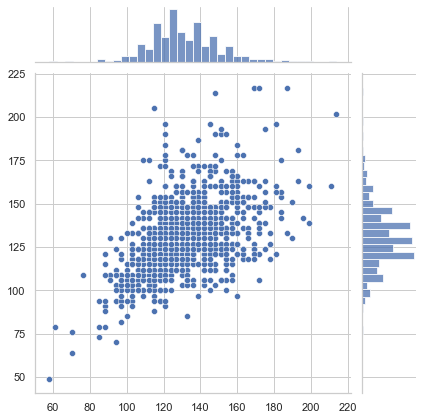

In [15]:
sns.jointplot(dim1,dim2)

In [16]:
np.mean(dim1)

130.92538461538462

In [17]:
np.mean(dim2)

130.75

In [18]:
image_shape=(130,130,3)

# Preparing the Data for the model
There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

Image Manipulation
Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [21]:
imread(para_cell).max()

0.78039217

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [23]:
para_img = imread(para_cell)

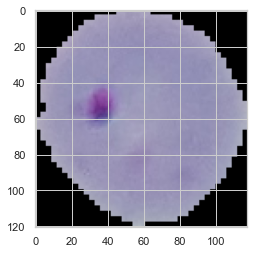

In [24]:
plt.imshow(para_img)

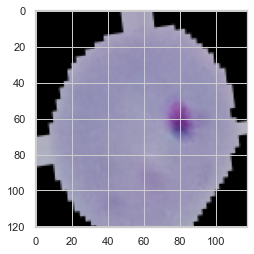

In [25]:
plt.imshow(image_gen.random_transform(para_img))

# Generating many manipulated images from a directory
In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

Image Data Folder
Class 1
0.jpg
1.jpg
...
Class 2
0.jpg
1.jpg
...
...
Class n

In [26]:
l = image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


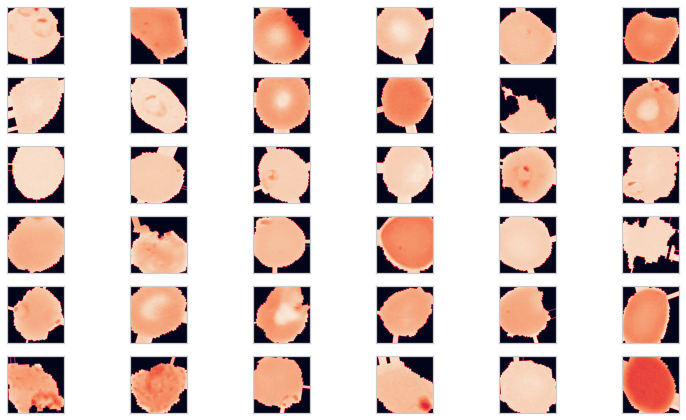

In [28]:
plt.figure(figsize=(11,6))
for i in range(36): 
    plt.subplot(6,6,i+1)
    p = l.next()
    plt.imshow(p[0][0][:,:,0])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()




# Creating the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [30]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

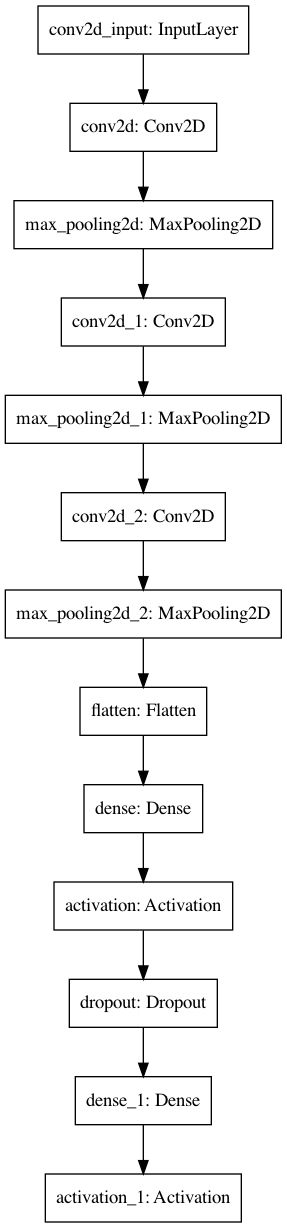

In [32]:
tf.keras.utils.plot_model(
    model, to_file='model.png'
)

# Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# TRAINING THE MODEL

In [34]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [35]:
image_shape[:2]

(130, 130)

In [36]:
batch_size = 16

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 194s 124ms/step - loss: 0.5426 - accuracy: 0.7179 - val_loss: 0.2521 - val_accuracy: 0.9181
Epoch 2/20
1560/1560 [==============================] - 199s 127ms/step - loss: 0.2112 - accuracy: 0.9296 - val_loss: 0.1810 - val_accuracy: 0.9369
Epoch 3/20
1560/1560 [==============================] - 200s 128ms/step - loss: 0.1767 - accuracy: 0.9457 - val_loss: 0.1658 - val_accuracy: 0.9458
Epoch 4/20
1560/1560 [==============================] - 199s 128ms/step - loss: 0.1675 - accuracy: 0.9478 - val_loss: 0.1614 - val_accuracy: 0.9469
Epoch 5/20
1560/1560 [==============================] - 202s 130ms/step - loss: 0.1599 - accuracy: 0.9509 - val_loss: 0.1596 - val_accuracy: 0.9465
Epoch 6/20
1560/1560 [==============================] - 205s 131ms/step - loss: 0.1578 - accuracy: 0.9499 - val_loss: 0.1667 - val_accuracy: 0.9465
Epoch 7/20
1560/1560 [==============

In [46]:
model.save("./mnist-digit/1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./mnist-digit/1/assets


# Evaluating the Model

In [43]:
losses = pd.DataFrame(model.history.history)


In [44]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.542649,0.717926,0.252146,0.918077
1,0.211211,0.929602,0.181026,0.936923
2,0.176707,0.945709,0.165808,0.945769
3,0.167458,0.947792,0.161432,0.946923
4,0.159877,0.950918,0.159642,0.946538


<AxesSubplot:>

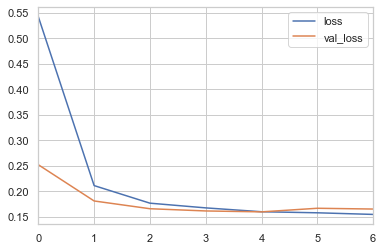

In [45]:
losses[['loss','val_loss']].plot()